In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib import style

In [3]:
data = pd.read_csv('./datasets/student-mat.csv',  sep = ';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
inputs = data['G1']
targets = data['G3']

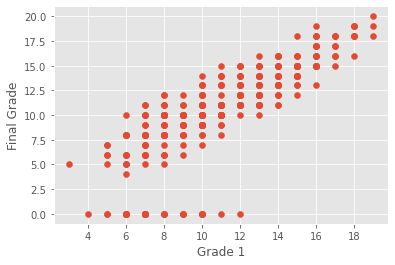

In [9]:
style.use('ggplot')
fig1 = plt.figure()
plt.scatter(inputs, targets)
plt.xlabel('Grade 1')
plt.ylabel('Final Grade')
plt.show()

In [17]:
targets = torch.Tensor(targets.to_numpy())

In [18]:
print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [19]:
w = torch.rand(1, requires_grad = True)
b = torch.rand(1, requires_grad = True)

In [20]:
model1 = (w, b)

In [21]:
def use_model(x, model):
    w, b = model
    return w * x + b

In [23]:
preds = use_model(inputs, model1)
preds

tensor([ 3.5776,  3.5776,  4.7413,  9.3959,  4.1595,  9.3959,  7.6504,  4.1595,
         9.9778,  8.8141,  6.4868,  6.4868,  8.8141,  6.4868,  8.8141,  8.8141,
         8.2323,  5.3231,  4.1595,  5.3231,  8.2323,  7.6504,  9.3959,  8.2323,
         6.4868,  4.1595,  7.6504,  9.3959,  7.0686,  6.4868,  5.9050, 10.5596,
        10.5596,  5.3231,  7.6504,  5.3231,  9.3959,  9.3959,  7.6504,  8.8141,
         4.7413,  7.6504, 11.7233,  5.3231,  6.4868,  5.3231,  7.0686, 11.7233,
         9.3959,  4.7413,  7.6504,  7.0686,  7.0686,  5.3231,  6.4868,  5.3231,
         8.8141,  8.8141,  5.9050,  9.3959,  6.4868,  6.4868,  5.3231,  6.4868,
         6.4868,  9.9778,  8.2323,  4.7413,  5.3231,  9.9778,  8.2323,  6.4868,
         5.3231,  7.6504,  7.0686,  5.9050,  7.0686,  7.0686,  5.3231,  3.5776,
         6.4868,  7.0686,  4.7413,  9.3959,  5.9050,  4.7413,  5.3231,  8.2323,
         7.0686,  5.3231,  4.7413,  9.9778,  4.7413,  7.0686,  7.0686,  4.7413,
         7.0686,  5.3231,  7.0686,  4.74

In [28]:
def plot_model(inputs, targets, model):
    style.use('ggplot')
    fig = plt.figure()
    
    plt.scatter(inputs, targets)
    x = torch.from_numpy(np.linspace(1, 21, 2))
    y = use_model(x, model).detach()
    plt.plot(x, y, color = 'darkblue')
    
    plt.show()
    return fig

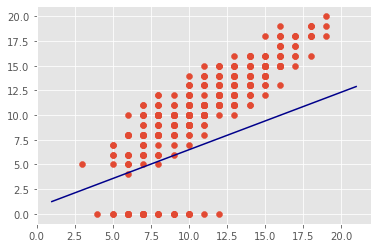

In [29]:
fig2 = plot_model(inputs, targets, model1)

In [30]:
def MSE(t1, t2):
    diff = t1 - t2
    sum_all = torch.sum(diff * diff)
    avg_diff = sum_all / diff.numel()
    return avg_diff

In [32]:
loss = MSE(preds, targets)
loss

tensor(22.0675, grad_fn=<DivBackward0>)

In [33]:
loss.backward()

In [34]:
w, b = model1
print(w.grad)
print(b.grad)

tensor([-85.6976])
tensor([-6.7992])


In [35]:
# gradient descent algorithm
# 1. generate preds (use_model function)
# 2. calculate error (MSE function)
# 3. calculate gradient (backaward function)
# 4. adjust weights and bias (gradient)
# 5. zero gradient
# 6. repeat

In [36]:
preds = use_model(inputs, model1)
loss = MSE(preds, targets)
loss.backward()

In [37]:
learning_rate = 1e-5
with torch.no_grad():
    w, b = model1
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

In [38]:
preds = use_model(inputs, model1)
loss = MSE(preds, targets)
loss

tensor(21.9201, grad_fn=<DivBackward0>)

In [39]:
def train_model(inputs, targets, model, epochs, learning_rate):
    for i in range(epochs):
        preds = use_model(inputs, model)
        loss = MSE(preds, targets)
        loss.backward()
        with torch.no_grad():
            w, b = model
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()
            

In [40]:
def create_random_model():
    w = torch.rand(1, requires_grad = True)
    b = torch.rand(1, requires_grad = True)
    return (w, b)

In [41]:
model2 = create_random_model()
train_model(inputs, targets, model2, 15000, 1e-5)

In [42]:
preds = use_model(inputs, model2)
loss = MSE(preds, targets)
loss

tensor(7.7991, grad_fn=<DivBackward0>)

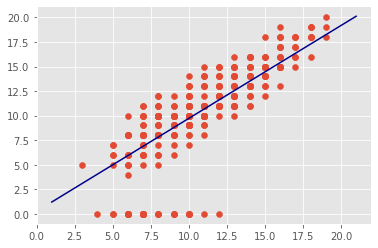

In [43]:
fig3 = plot_model(inputs, targets, model2)

In [44]:
def train_model(inputs, targets, model, epochs, learning_rate):
    losses = []
    for i in range(epochs):
        preds = use_model(inputs, model)
        loss = MSE(preds, targets)
        loss.backward()
        loss_value = loss.item()
        losses.append(loss_value)
        with torch.no_grad():
            w, b = model
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()
    return losses

In [47]:
model3 = create_random_model()
losses = train_model(inputs, targets, model3, 6000, 1e-5)

In [98]:
def plot_model(inputs, targets, model, losses):
    style.use('ggplot')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
    
    ax1.scatter(inputs, targets)
    x = torch.from_numpy(np.linspace(1, 21, 2))
    y = use_model(x, model).detach()
    ax1.plot(x, y, color = 'darkblue')
    ax1.set_xlabel('Grade 1', fontsize = 12, fontweight = 'semibold')
    ax1.set_ylabel('Final Grade', fontsize = 12, fontweight = 'semibold')
    
    ax2.plot(losses, color = 'g')
    ax2.set_xlabel('Epochs', fontsize = 12, fontweight = 'semibold')
    ax2.set_ylabel('Loss value', fontsize = 12, fontweight = 'semibold')
    
    plt.show()
    return fig

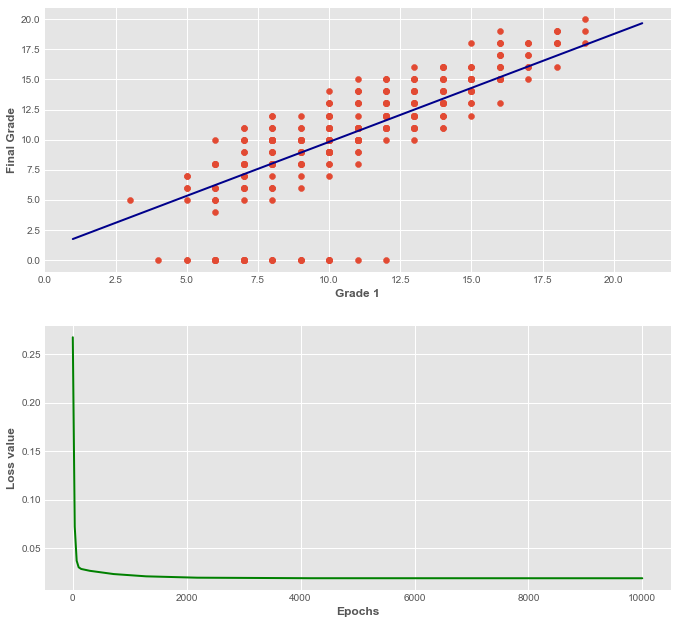

In [99]:
fig4 = plot_model(inputs, targets, model3, losses)

In [50]:
def normalize(x):
    x_min = x.min().item()
    x_max = x.max().item()
    nx = x.clone().detach()
    nx = (nx - x_min) / (x_max - x_min)
    return nx

In [51]:
n_inputs = normalize(inputs)
n_targets = normalize(targets)

In [81]:
def plot_model(inputs, targets, model, losses):
    style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
    
    ax1.scatter(inputs, targets)
    x = torch.from_numpy(np.linspace(0, 1, 2))
    y = use_model(x, model).detach()
    ax1.plot(x, y, color = 'y', linewidth = 2)
    ax1.set_xlabel('Grade 1', fontsize = 12, fontweight = 'semibold')
    ax1.set_ylabel('Final Grade', fontsize = 12, fontweight = 'semibold')
    
    ax2.plot(losses, color = 'g', linewidth = 2)
    ax2.set_xlabel('Epochs', fontsize = 12, fontweight = 'semibold')
    ax2.set_ylabel('Loss value', fontsize = 12, fontweight = 'semibold')
    ax2.set_ylim(bottom = 0, top = 1)
    
    plt.show()
    return fig

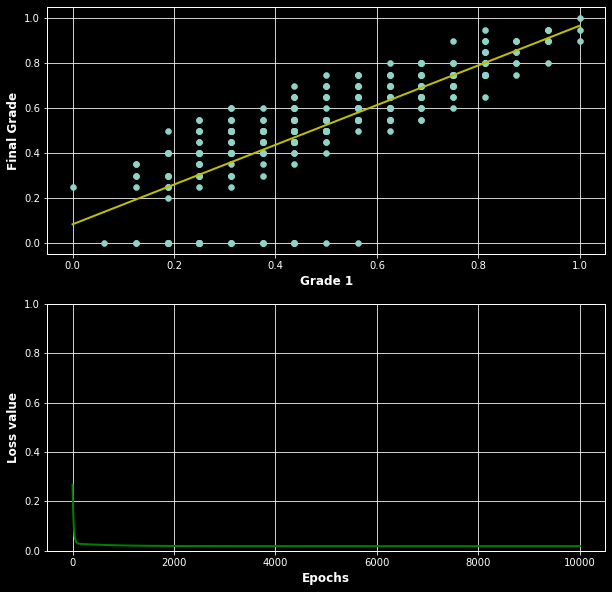

In [83]:
model4 = create_random_model()
losses = train_model(n_inputs, n_targets, model4, 10000, 0.01)
fig5 = plot_model(n_inputs, n_targets, model4, losses)

In [59]:
def rescale(x, x_min, x_max,):
    sx = x.clone().detach()
    sx = sx * (x_max - x_min) + x_min
    return sx

In [62]:
print(targets.min())
print(targets.max())
print(inputs.min())
print(inputs.max())

tensor(0.)
tensor(20.)
tensor(3.)
tensor(19.)


In [61]:
s_targets = rescale(n_targets, 0, 20)
s_targets

tensor([ 6.,  6., 10., 15., 10., 15., 11.,  6., 19., 15.,  9., 12., 14., 11.,
        16., 14., 14., 10.,  5., 10., 15., 15., 16., 12.,  8.,  8., 11., 15.,
        11., 11., 12., 17., 16., 12., 15.,  6., 18., 15., 11., 13., 11., 12.,
        18., 11.,  9.,  6., 11., 20., 14.,  7., 13., 13., 10., 11., 13., 10.,
        15., 15.,  9., 16., 11., 11.,  9.,  9., 10., 15., 12.,  6.,  8., 16.,
        15., 10.,  5., 14., 11., 10., 10., 11., 10.,  5., 12., 11.,  6., 15.,
        10.,  8.,  6., 14., 10.,  7.,  8., 18.,  6., 10., 14., 10., 15., 10.,
        14.,  8.,  5., 17., 14.,  6., 18., 11.,  8., 18., 13., 16., 19., 10.,
        13., 19.,  9., 16., 14., 13.,  8., 13., 15., 15., 13., 13.,  8., 12.,
        11.,  9.,  0., 18.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0., 12., 15.,
         0.,  9., 11., 13.,  0., 11.,  0., 11.,  0., 10.,  0., 14., 10.,  0.,
        12.,  8., 13., 10., 15., 12.,  0.,  7.,  0., 10.,  7., 12., 10., 16.,
         0., 14.,  0., 16., 10.,  0.,  9.,  9., 11.,  6.,  9., 1

In [69]:
def normalize(x, x_min, x_max):
    nx = x.clone().detach()
    nx = (nx - x_min) / (x_max - x_min)
    return nx

def predict_final_grade(grade_1):
    G1 = torch.tensor(grade_1)
    pred = use_model(grade_1, model4)
    return pred.item()

In [72]:
final_grade = predict_final_grade(20)
print('The final grade will be: {}'.format(final_grade))

The final grade will be: 17.767908096313477
